#### Assignment 4:GMM-Based Synthetic Sampling for Imbalanced Data

In [1]:
# all required files are imported 
%matplotlib inline
import numpy as np
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
# credit card data downloded
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
file_path = os.path.join(path, "creditcard.csv")

In [3]:
# credit card data loaded in pandas
df=pd.read_csv(file_path)

In [4]:
df.shape

(284807, 31)

In [5]:
# Credit card data
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# credit card data columns summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# credit card data : checking number of null elements in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Statical parameters of different columns of intrest
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [10]:
df['Amount'].value_counts()

Amount
1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
202.24        1
252.85        1
615.52        1
180.93        1
807.48        1
Name: count, Length: 32767, dtype: int64

In [11]:
# Getting to know about overall categories
df['Class'].unique()

array([0, 1])

In [12]:
# Summary of class 0 and 1
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

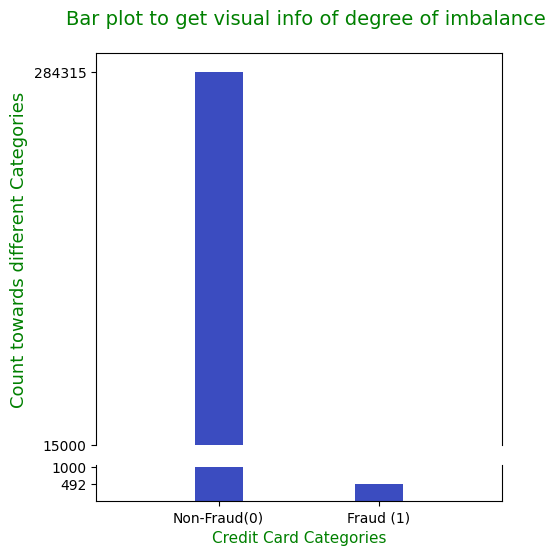

In [13]:
# code to draw bar graph of the classes to get to know more about imbalance
counts=df['Class'].value_counts()
index=counts.index
values=counts.values
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(5,5),gridspec_kw={'height_ratios':[11,1],'hspace':-0.1},constrained_layout=True)
norm = plt.Normalize(min(values), max(values))
colors = plt.cm.coolwarm(norm(values))
ax1.bar([-1,0,1,2,3],[0,values[0],0,0,0],width=0.6,color=colors)
ax2.bar([-1,0,1,2,3],[0,1000,0,values[1],0],width=0.6,color=colors)
ax1.set_xticks([])
ax1.spines['bottom'].set_visible(False) 
ax1.set_yticks([0,284315],labels=[15000,284315])
ax2.set_xticks([0,2],labels=['Non-Fraud(0)','Fraud (1)'])
ax2.set_yticks([492,1000])
ax2.spines['top'].set_visible(False)
ax1.set_ylabel("Count towards different Categories",fontsize='13',color='green')
plt.xlabel('Credit Card Categories',fontsize=11,color='green')
fig.suptitle("Bar plot to get visual info of degree of imbalance",color='green',fontsize=14,x=0.60,y=1.08)
plt.show()

In [14]:
# imported train_test_split for uniform split
from sklearn.model_selection import train_test_split

In [15]:
x=df.drop('Class',axis=1)
x.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
# applying standard scaling
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
columns=x.columns
x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=columns)
x.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [18]:
y=df['Class']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [19]:
# splitting the data in training and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [20]:
x_train.shape

(199364, 30)

In [21]:
y_train.shape

(199364,)

In [22]:
y_train.value_counts()

Class
0    199020
1       344
Name: count, dtype: int64

In [23]:
x_test.shape

(85443, 30)

In [24]:
y_test.shape

(85443,)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# Model training for baseline case
model1=LogisticRegression(max_iter=100,solver='liblinear',random_state=42)
model1.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_predict=model1.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,accuracy_score

In [29]:
# classification result for base line case
print("Classification score for base line model \n",classification_report(y_test,y_predict))

Classification score for base line model 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [30]:
# Accuracy score for base line case
print("Accuracy score for base line model\n",accuracy_score(y_test,y_predict))

Accuracy score for base line model
 0.9991807403766253


##### Evaluation of the Baseline Model on the Test Set

From the classification report:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Legitimate)**   | 1.00 | 1.00 | 1.00 | 85,443 |
| **1 (Fraudulent)**   | 0.86 | 0.63 | 0.73 | 148 |

- **Accuracy**: **0.9989 (~99.9%)**  
- **Macro Average (both classes equally weighted)**: Precision = 0.86, Recall = 0.63, F1 = 0.73 
- **Weighted Average (dominated by Class 0)**: ~1.00 across metrics  

👉 The model almost perfectly classifies legitimate transactions but struggles with fraud cases — only **65% of frauds are detected**.

---

##### Why Accuracy is Misleading in This Problem

- The dataset is **highly imbalanced**: ~86k legitimate vs only 148 fraudulent.  
- A model that **predicts everything as legitimate** would still achieve **~99.8% accuracy**, yet detect **0 frauds**.  
- Therefore, accuracy is dominated by the majority class and gives a **false sense of performance**.

---

##### Why Precision, Recall, and F1-score are More Informative

##### Precision (0.86 for fraud class)
- Of all transactions predicted as fraud, **86% were truly fraud**.  
- Important because a low precision would mean many false alarms (legitimate customers flagged as fraud).  

##### Recall (0.63 for fraud class)
- The model detects only **63% of actual fraud cases**.  
- Low recall is dangerous because many frauds would still go unnoticed.  

##### F1-score (0.73 for fraud class)
- Balances precision and recall.  
- Since fraud detection requires both **catching fraud (recall)** and **avoiding false alarms (precision)**, F1 is a better overall indicator than accuracy.

---

##### Conclusion

- The baseline model achieves **very high accuracy (99.9%)**, but this is misleading due to class imbalance.  
- For the **minority fraud class**, the model’s **recall = 0.63** means **37% of frauds are missed**, which is unacceptable in real-world fraud detection.  
- Thus, **Precision, Recall, and F1-score for the fraud class** are the **true indicators of model performance**, while accuracy should be largely ignored.  


In [31]:
#### Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling

### Fundamental Difference Between GMM-based Synthetic Sampling and SMOTE

- **SMOTE (Synthetic Minority Over-sampling Technique):**  
  SMOTE creates synthetic samples by interpolating between a minority point and its nearest neighbors. This is straightforward but assumes that the minority class distribution is locally linear. As a result, it may generate **artificial points in regions that don’t truly represent the minority distribution**, especially if the class has multiple clusters or irregular shapes.

- **GMM-based Synthetic Sampling (Gaussian Mixture Models):**  
  GMM builds a **probabilistic model of the minority data** using a mixture of Gaussian components. Each Gaussian can represent a different sub-group (or cluster) of the minority class. Synthetic points are then sampled from this distribution, ensuring they follow the same statistical properties as the original minority data.  

---

### Why GMM is Theoretically Better for Minority Classes

1. **Explicit Modeling of Minority Sub-Groups:**  
   The minority class often contains **multiple sub-clusters** (e.g., different types of fraud, different rare disease patterns). SMOTE cannot distinguish between them—it may interpolate across clusters, producing unrealistic points. GMM, however, naturally identifies and models each sub-group through separate Gaussian components, preserving their individuality.

2. **Captures Complex Geometries in Minority Data:**  
   Minority distributions may not be spherical or linear—they can be elongated, skewed, or highly irregular. GMM accounts for this by using covariance matrices, which capture the **true spread and orientation** of each sub-cluster. This means generated samples respect the real shape of minority data, unlike SMOTE which only draws straight lines.

3. **Density-Aware Sampling Protects Minority Integrity:**  
   SMOTE spreads synthetic points evenly, regardless of whether the area is dense or sparse. This can **flood sparse regions** with artificial points, creating noise. In contrast, GMM generates more samples where the minority class is naturally dense and fewer in low-density areas, ensuring synthetic data **matches the true distribution of the minority**.

4. **Reduced Overlap with Majority Class:**  
   A big risk in imbalanced problems is generating minority points that overlap with majority regions, making the boundary fuzzy. Since GMM learns the **probabilistic boundaries of minority data**, its samples are more likely to stay within the genuine minority space, improving class separability.

---

**In summary:**  
SMOTE is simple but treats the minority class as a set of linear neighborhoods. GMM is theoretically stronger because it **learns the underlying probability distribution of the minority class itself**—capturing multiple sub-groups, respecting complex shapes, generating density-aware samples, and avoiding majority overlap. This makes GMM-based synthetic sampling much more effective when the minority class has **rich internal structure** rather than being a single uniform group.


In [32]:
from sklearn.mixture import GaussianMixture

In [33]:
# filtering out minority data from training date
x_minority=x_train[y_train==1].copy()

In [34]:
x_minority.shape

(344, 30)

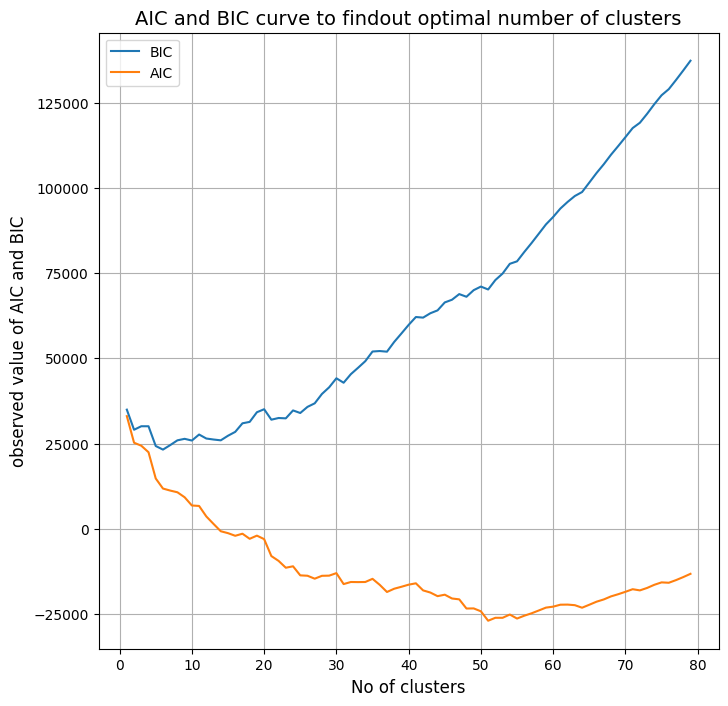

In [35]:
# finding out optimal number of clusters using AIC and BIC
n_components=np.arange(1,80)
models=[GaussianMixture(n,covariance_type='full',random_state=42).fit(x_minority) for n in n_components]
plt.figure(figsize=(8,8))
plt.plot(n_components,[m.bic(x_minority) for m in models],label='BIC')
plt.plot(n_components,[m.aic(x_minority) for m in models],label='AIC')
plt.grid()
plt.legend(loc='best')
plt.xlabel('No of clusters',fontsize=12)
plt.ylabel('observed value of AIC and BIC',fontsize=12)
plt.title("AIC and BIC curve to findout optimal number of clusters",fontsize=14)
plt.show()

In [36]:
# No of cluster as per BIC
BIC=[m.bic(x_minority) for m in models]
Bic_min=min(BIC)
for k in n_components:
    if Bic_min==BIC[k]:
        break
print("No of clusters as per BIC",k)


No of clusters as per BIC 5


In [37]:
# No of clusters as per AIC
AIC=[m.aic(x_minority) for m in models]
aic_min=min(AIC)
for k in n_components:
    if aic_min==AIC[k]:
        break
print("No of clusters as per AIC",k)


No of clusters as per AIC 50


In [38]:
# GaussMisture Model with 32 clusters
gmm=GaussianMixture(5,covariance_type='full',random_state=42)
gmm.fit(x_minority)

,n_components,5
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


##### Why BIC is Preferred Over AIC in Gaussian Mixture Models (GMM) for Oversampling

##### Role of Model Selection
- In GMM-based oversampling, we must decide the number of clusters (components).  
- This decision controls how well synthetic samples represent the true minority class distribution.  

###### AIC vs BIC
- **AIC (Akaike Information Criterion):**  
  \[
  AIC = 2k - 2\ln(\hat{L})
  \]  
  → Lighter penalty on number of parameters → often selects more clusters → risk of overfitting.  

- **BIC (Bayesian Information Criterion):**  
  \[
  BIC = k \ln(n) - 2\ln(\hat{L})
  \]  
  → Stronger penalty (depends on sample size \(n\)) → prefers fewer, meaningful clusters → avoids overfitting.  

###### Why Prefer BIC in Oversampling
- Prevents **too many clusters** → avoids noisy synthetic samples.  
- Encourages **parsimonious models** → generalizes better to unseen data.  
- Penalty grows with dataset size → more robust as data increases.  
- Leads to **realistic and interpretable** synthetic points.  

###### ✅ Conclusion
- **AIC** → risks overfitting with too many clusters.  
- **BIC** → balances fit and simplicity, ensuring high-quality synthetic samples.  

👉 Therefore, **BIC is preferred over AIC for selecting number of clusters in GMM-based oversampling**.
Therefore I choose 5 no of clusters


In [39]:
# Genrated new samples to balance the majority and minority
x_new_gmm,_=gmm.sample(199364)
x_new_gmm

array([[  0.94856169,  -2.34697696,  -0.62975663, ...,   0.74140179,
          1.00254207,   3.52747311],
       [ -0.22716022,  -2.68901308,  -0.87545063, ...,   0.56949552,
          0.17248332,   2.75178636],
       [  0.48515272,  -1.81846618,  -1.5143    , ...,  -1.60787334,
          2.52552772,   2.14288958],
       ...,
       [ -0.1980155 ,  -2.63189656,   4.96568653, ...,  -6.0834731 ,
          2.41549681,  -0.25417967],
       [ -0.92329558, -10.40173557,   7.27283412, ...,  -0.19019137,
          0.06405738,  -0.5125418 ],
       [ -1.29571195, -13.4390179 ,   8.72762501, ...,  -3.89619648,
         -0.52760936,   0.03495094]], shape=(199364, 30))

In [40]:
# converting into dataframe
columns=x_minority.columns
x_new_gmm=pd.DataFrame(x_new_gmm,columns=columns)
x_new_gmm.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.948562,-2.346977,-0.629757,-3.744863,1.748530,-3.192762,1.935891,1.012428,-2.979682,-1.080556,-2.851505,3.523908,-3.074243,-2.293757,-7.707883,0.651657,-1.347329,-3.432263,0.348700,4.101423,0.855211,-1.764020,1.686588,5.876829,-0.281948,1.814482,1.748513,0.741402,1.002542,3.527473
1,-0.227160,-2.689013,-0.875451,-3.058747,2.607335,-0.729061,-0.408280,-3.876052,-0.327647,-1.463910,-2.657980,3.469969,-4.207940,-1.493437,-3.195147,0.614393,-5.125019,-7.711392,-3.160828,3.300577,2.116489,-2.402741,1.074322,-7.267064,-0.066695,-1.225900,2.433145,0.569496,0.172483,2.751786
2,0.485153,-1.818466,-1.514300,-1.780020,4.419545,0.697373,0.380747,0.350261,-0.849053,-0.667059,3.554602,1.785225,-2.912445,0.614749,0.301850,-0.481585,0.514804,-0.906283,-0.652922,0.913221,-0.295408,3.225553,-0.328379,3.800401,0.637397,-1.871239,2.672081,-1.607873,2.525528,2.142890
3,-0.701220,-1.581036,-0.392964,-2.608277,4.412604,-0.890873,-0.787884,0.112310,-0.626590,-1.467658,-2.369195,1.820916,-2.528160,1.431431,-6.184611,1.265667,-1.789218,1.073039,0.970933,0.698019,2.212298,1.764311,0.017426,0.678679,0.066356,-0.492372,0.159771,2.071232,-1.032047,2.168475
4,1.406825,-1.537038,-3.114430,-2.762768,4.800701,3.456125,-2.033153,-2.284942,-0.776725,-0.200426,0.371448,1.877987,-1.740170,0.040797,-3.850446,-1.239419,0.346833,0.103519,1.000198,-1.009526,2.698588,1.901373,-1.217106,-5.305845,-1.461635,-2.009603,-0.010663,0.072948,-0.023956,2.892177


In [41]:
x_new_gmm.shape

(199364, 30)

##### How Samples Are Generated in a Gaussian Mixture Model  

When generating new data with a Gaussian Mixture Model (GMM), the process follows these steps:  

1. **Select a component according to mixture weights**  
   - Each Gaussian in the mixture has an associated weight (\(\pi_k\)) that indicates its relative importance.  
   - For every new sample, one component is chosen randomly in proportion to these weights.  

2. **Draw a point from the chosen Gaussian**  
   - Once a component is selected, its parameters — the mean vector (\(\mu_k\)) and covariance matrix (\(\Sigma_k\)) — define the distribution.  
   - A random sample is then drawn from this multivariate Gaussian.  

3. **Repeat for all required samples**  
   - This procedure is repeated until the desired number of samples is generated.  
   - The output therefore contains:  
     - The generated feature values.  
     - The index of the Gaussian component from which each sample originated.  


In [42]:
# combining data generated from GMM to y_ balance overall data set
y_new_gmm=pd.DataFrame(np.ones((199364,1),dtype=int),columns=['Class'])
y_new_gmm.head(5)


,Class
0,1
1,1
2,1
3,1
4,1


In [43]:
y_new_gmm.shape

(199364, 1)

In [44]:
# combining both Y_new_gmm and x_new_gmm
df_new_gmm=pd.concat((x_new_gmm,y_new_gmm),axis=1).reset_index(drop=True)
df_new_gmm.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.948562,-2.346977,-0.629757,-3.744863,1.748530,-3.192762,1.935891,1.012428,-2.979682,-1.080556,-2.851505,3.523908,-3.074243,-2.293757,-7.707883,0.651657,-1.347329,-3.432263,0.348700,4.101423,0.855211,-1.764020,1.686588,5.876829,-0.281948,1.814482,1.748513,0.741402,1.002542,3.527473,1
1,-0.227160,-2.689013,-0.875451,-3.058747,2.607335,-0.729061,-0.408280,-3.876052,-0.327647,-1.463910,-2.657980,3.469969,-4.207940,-1.493437,-3.195147,0.614393,-5.125019,-7.711392,-3.160828,3.300577,2.116489,-2.402741,1.074322,-7.267064,-0.066695,-1.225900,2.433145,0.569496,0.172483,2.751786,1
2,0.485153,-1.818466,-1.514300,-1.780020,4.419545,0.697373,0.380747,0.350261,-0.849053,-0.667059,3.554602,1.785225,-2.912445,0.614749,0.301850,-0.481585,0.514804,-0.906283,-0.652922,0.913221,-0.295408,3.225553,-0.328379,3.800401,0.637397,-1.871239,2.672081,-1.607873,2.525528,2.142890,1
3,-0.701220,-1.581036,-0.392964,-2.608277,4.412604,-0.890873,-0.787884,0.112310,-0.626590,-1.467658,-2.369195,1.820916,-2.528160,1.431431,-6.184611,1.265667,-1.789218,1.073039,0.970933,0.698019,2.212298,1.764311,0.017426,0.678679,0.066356,-0.492372,0.159771,2.071232,-1.032047,2.168475,1
4,1.406825,-1.537038,-3.114430,-2.762768,4.800701,3.456125,-2.033153,-2.284942,-0.776725,-0.200426,0.371448,1.877987,-1.740170,0.040797,-3.850446,-1.239419,0.346833,0.103519,1.000198,-1.009526,2.698588,1.901373,-1.217106,-5.305845,-1.461635,-2.009603,-0.010663,0.072948,-0.023956,2.892177,1


In [45]:
# combinning to form balance dataset with the help of gmm
df_in=pd.concat((x_train,y_train),axis=1).reset_index(drop=True)
df_oversampled = pd.concat((df_new_gmm, df_in), axis=0).reset_index(drop=True)
df_oversampled.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.948562,-2.346977,-0.629757,-3.744863,1.748530,-3.192762,1.935891,1.012428,-2.979682,-1.080556,-2.851505,3.523908,-3.074243,-2.293757,-7.707883,0.651657,-1.347329,-3.432263,0.348700,4.101423,0.855211,-1.764020,1.686588,5.876829,-0.281948,1.814482,1.748513,0.741402,1.002542,3.527473,1
1,-0.227160,-2.689013,-0.875451,-3.058747,2.607335,-0.729061,-0.408280,-3.876052,-0.327647,-1.463910,-2.657980,3.469969,-4.207940,-1.493437,-3.195147,0.614393,-5.125019,-7.711392,-3.160828,3.300577,2.116489,-2.402741,1.074322,-7.267064,-0.066695,-1.225900,2.433145,0.569496,0.172483,2.751786,1
2,0.485153,-1.818466,-1.514300,-1.780020,4.419545,0.697373,0.380747,0.350261,-0.849053,-0.667059,3.554602,1.785225,-2.912445,0.614749,0.301850,-0.481585,0.514804,-0.906283,-0.652922,0.913221,-0.295408,3.225553,-0.328379,3.800401,0.637397,-1.871239,2.672081,-1.607873,2.525528,2.142890,1
3,-0.701220,-1.581036,-0.392964,-2.608277,4.412604,-0.890873,-0.787884,0.112310,-0.626590,-1.467658,-2.369195,1.820916,-2.528160,1.431431,-6.184611,1.265667,-1.789218,1.073039,0.970933,0.698019,2.212298,1.764311,0.017426,0.678679,0.066356,-0.492372,0.159771,2.071232,-1.032047,2.168475,1
4,1.406825,-1.537038,-3.114430,-2.762768,4.800701,3.456125,-2.033153,-2.284942,-0.776725,-0.200426,0.371448,1.877987,-1.740170,0.040797,-3.850446,-1.239419,0.346833,0.103519,1.000198,-1.009526,2.698588,1.901373,-1.217106,-5.305845,-1.461635,-2.009603,-0.010663,0.072948,-0.023956,2.892177,1
5,-0.335826,-1.104734,0.617094,-3.268853,2.996866,-2.304788,-0.328242,0.098823,0.564944,-4.147100,-5.038571,3.164009,-4.124223,0.139483,-7.849732,0.755333,-3.649287,-4.422529,-1.092582,1.754508,2.045016,-3.680398,3.230584,7.180936,0.176111,0.313049,2.861861,0.119407,-1.728559,0.052972,1
6,0.965076,-1.648119,-3.729921,-3.085982,1.459566,-1.055790,-2.078468,0.928326,4.030405,-0.815261,-2.013185,2.359018,-2.263510,-0.243858,-3.501076,-0.309349,-2.073609,-3.721369,-1.836241,0.969891,1.159565,1.061044,0.942058,0.823699,1.213045,0.745269,0.558963,0.193663,-1.478481,2.891957,1
7,-0.234672,-0.834772,0.881277,-0.621274,-0.214818,-2.346424,2.626441,0.693525,-5.402750,1.480702,-0.147874,-1.060515,-1.079397,-0.747902,-0.882709,-0.893779,-2.804474,-2.852867,-1.059029,0.479601,-2.507222,-1.226616,-0.176040,-5.971029,0.164544,-0.326493,-0.525248,1.629176,-3.272179,2.756229,1


In [46]:
df_oversampled.shape

(398728, 31)

In [47]:
df_oversampled['Class'].value_counts()

Class
1    199708
0    199020
Name: count, dtype: int64

In [48]:
from imblearn.under_sampling import ClusterCentroids

In [49]:
from sklearn.cluster import MiniBatchKMeans

In [50]:
fast_kmeans = MiniBatchKMeans(n_clusters=8000, batch_size=1000, n_init=3, random_state=42)

In [51]:
# keep 8k majority, 344 minorityrandom_state=42)
cc = ClusterCentroids(sampling_strategy={0: 8000, 1: 344}, random_state=42,estimator=fast_kmeans)
df_undersampled=cc.fit_resample(x_train,y_train)

In [52]:
x_undersample,y_undersample=df_undersampled

In [53]:
x_undersample.shape

(8344, 30)

In [54]:
y_undersample.shape

(8344,)

In [55]:
df_undersampled=pd.concat((x_undersample,y_undersample),axis=1)

In [56]:
# undersampled data frame
df_undersampled.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.503960,1.049072,0.365217,-2.092716,0.429569,0.919629,-0.957728,0.543285,-0.238469,-0.142378,-0.798585,1.689387,0.107263,-0.868837,-2.196763,-0.650733,0.549471,2.386077,1.208052,-0.115373,-0.205010,-0.022317,0.142443,-0.060064,0.858696,0.639652,1.381668,-0.212502,-0.073907,-0.350191,0
1,-1.368105,0.633800,0.205461,0.264128,0.516308,-0.347986,-0.879377,0.068163,-0.177074,0.030272,-0.238264,0.067604,0.266254,0.122956,-0.216491,1.183570,0.469591,0.028468,-0.445166,-0.318568,-0.117603,-0.371325,-1.095320,0.244396,0.874848,0.361847,0.172570,-0.059918,0.095538,-0.341291,0
2,1.017290,1.007417,-0.282608,-0.923565,0.052241,0.133273,0.033625,-0.147819,0.024085,0.791068,0.055155,0.088096,0.633293,-0.586347,0.356742,-0.826759,0.011881,-0.727369,0.435961,0.790428,-0.176143,0.090805,0.386813,0.037068,0.319591,0.187455,0.382437,-0.126572,-0.189973,-0.178180,0
3,-0.449163,-0.294081,0.165349,0.759223,0.666848,-0.140773,0.072412,1.280016,-0.273106,-0.449278,-0.174681,-0.193699,-0.203447,-0.013955,0.098446,1.414196,-0.559321,-0.137316,-0.351682,-0.261116,0.460788,0.276429,0.740380,0.349745,0.112350,0.160958,-0.604131,-0.406844,-0.597565,0.568689,0
4,-0.802346,0.634076,0.244019,0.209087,0.482578,-0.195924,-0.750828,0.123742,-0.206987,-0.106771,-0.292562,0.120374,0.766787,1.213769,-0.499772,1.105707,0.461273,-0.039777,-0.552653,-0.297662,-0.012364,-0.367878,-1.021232,0.184892,0.561900,0.460685,0.194002,-0.039782,0.101663,-0.323724,0


In [57]:
# generating sample from gmm to balance 
x_sample_undersample,_=gmm.sample(8000-344)
x_sample_undersample=pd.DataFrame(x_sample_undersample,columns=x_train.columns)


In [58]:
# generating required labels
y_sample_undersample=pd.DataFrame(np.ones((8000-344,1),dtype=int),columns=['Class'])
y_sample_undersample.shape

(7656, 1)

In [59]:
# merging both
df_sample_undersample=pd.concat((x_sample_undersample,y_sample_undersample),axis=1)
df_sample_undersample.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.948562,-2.346977,-0.629757,-3.744863,1.748530,-3.192762,1.935891,1.012428,-2.979682,-1.080556,-2.851505,3.523908,-3.074243,-2.293757,-7.707883,0.651657,-1.347329,-3.432263,0.348700,4.101423,0.855211,-1.764020,1.686588,5.876829,-0.281948,1.814482,1.748513,0.741402,1.002542,3.527473,1
1,-0.227160,-2.689013,-0.875451,-3.058747,2.607335,-0.729061,-0.408280,-3.876052,-0.327647,-1.463910,-2.657980,3.469969,-4.207940,-1.493437,-3.195147,0.614393,-5.125019,-7.711392,-3.160828,3.300577,2.116489,-2.402741,1.074322,-7.267064,-0.066695,-1.225900,2.433145,0.569496,0.172483,2.751786,1
2,0.485153,-1.818466,-1.514300,-1.780020,4.419545,0.697373,0.380747,0.350261,-0.849053,-0.667059,3.554602,1.785225,-2.912445,0.614749,0.301850,-0.481585,0.514804,-0.906283,-0.652922,0.913221,-0.295408,3.225553,-0.328379,3.800401,0.637397,-1.871239,2.672081,-1.607873,2.525528,2.142890,1
3,-0.701220,-1.581036,-0.392964,-2.608277,4.412604,-0.890873,-0.787884,0.112310,-0.626590,-1.467658,-2.369195,1.820916,-2.528160,1.431431,-6.184611,1.265667,-1.789218,1.073039,0.970933,0.698019,2.212298,1.764311,0.017426,0.678679,0.066356,-0.492372,0.159771,2.071232,-1.032047,2.168475,1
4,1.406825,-1.537038,-3.114430,-2.762768,4.800701,3.456125,-2.033153,-2.284942,-0.776725,-0.200426,0.371448,1.877987,-1.740170,0.040797,-3.850446,-1.239419,0.346833,0.103519,1.000198,-1.009526,2.698588,1.901373,-1.217106,-5.305845,-1.461635,-2.009603,-0.010663,0.072948,-0.023956,2.892177,1


In [60]:
df_sample_undersample.shape

(7656, 31)

In [61]:
df_final_undersample=pd.concat((df_sample_undersample,df_undersampled),axis=0)

In [62]:
df_final_undersample.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.948562,-2.346977,-0.629757,-3.744863,1.748530,-3.192762,1.935891,1.012428,-2.979682,-1.080556,-2.851505,3.523908,-3.074243,-2.293757,-7.707883,0.651657,-1.347329,-3.432263,0.348700,4.101423,0.855211,-1.764020,1.686588,5.876829,-0.281948,1.814482,1.748513,0.741402,1.002542,3.527473,1
1,-0.227160,-2.689013,-0.875451,-3.058747,2.607335,-0.729061,-0.408280,-3.876052,-0.327647,-1.463910,-2.657980,3.469969,-4.207940,-1.493437,-3.195147,0.614393,-5.125019,-7.711392,-3.160828,3.300577,2.116489,-2.402741,1.074322,-7.267064,-0.066695,-1.225900,2.433145,0.569496,0.172483,2.751786,1
2,0.485153,-1.818466,-1.514300,-1.780020,4.419545,0.697373,0.380747,0.350261,-0.849053,-0.667059,3.554602,1.785225,-2.912445,0.614749,0.301850,-0.481585,0.514804,-0.906283,-0.652922,0.913221,-0.295408,3.225553,-0.328379,3.800401,0.637397,-1.871239,2.672081,-1.607873,2.525528,2.142890,1
3,-0.701220,-1.581036,-0.392964,-2.608277,4.412604,-0.890873,-0.787884,0.112310,-0.626590,-1.467658,-2.369195,1.820916,-2.528160,1.431431,-6.184611,1.265667,-1.789218,1.073039,0.970933,0.698019,2.212298,1.764311,0.017426,0.678679,0.066356,-0.492372,0.159771,2.071232,-1.032047,2.168475,1
4,1.406825,-1.537038,-3.114430,-2.762768,4.800701,3.456125,-2.033153,-2.284942,-0.776725,-0.200426,0.371448,1.877987,-1.740170,0.040797,-3.850446,-1.239419,0.346833,0.103519,1.000198,-1.009526,2.698588,1.901373,-1.217106,-5.305845,-1.461635,-2.009603,-0.010663,0.072948,-0.023956,2.892177,1


In [63]:
# under sampled data frame with balance 0 and 1 
df_final_undersample['Class'].value_counts()

Class
1    8000
0    8000
Name: count, dtype: int64

In [64]:
## Trianing Logistic regression for both oversampled and undersampled

In [65]:
model_oversample=LogisticRegression(solver='liblinear')

In [66]:
model_oversample.fit(df_oversampled.drop('Class',axis=1),df_oversampled['Class'])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [67]:
y_oversample_predict=model_oversample.predict(x_test)

In [68]:
# classification report for oversampled model
print("classification_report for oversample model\n",classification_report(y_test,y_oversample_predict))

classification_report for oversample model
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.09      0.86      0.16       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.58     85443
weighted avg       1.00      0.98      0.99     85443



In [69]:
# accuracy_score for oversampled model
print("accuracy_score for oversampled model\n",accuracy_score(y_test,y_oversample_predict))

accuracy_score for oversampled model
 0.9843989560291656


In [70]:
# Training Model for undersample model

In [71]:
model_undersample=LogisticRegression(solver='liblinear')

In [72]:
model_undersample.fit(df_final_undersample.drop('Class',axis=1),df_final_undersample['Class'])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [73]:
y_undersample=model_undersample.predict(x_test)

In [74]:
# classification_report for undersample model
print("classification_report for undersample model\n",classification_report(y_test,y_undersample))

classification_report for undersample model
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.09      0.85      0.17       148

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443



In [75]:
# accuracy_score for undersample model
print ("accuracy_score for undersample model\n",accuracy_score(y_test,y_undersample))

accuracy_score for undersample model
 0.9854639935395527


Summary Table (Minority Class - Fraud):


,Precision,Recall,F1-score
Baseline,0.86,0.63,0.73
GMM Oversample,0.09,0.86,0.16
Undersample + GMM,0.09,0.85,0.17


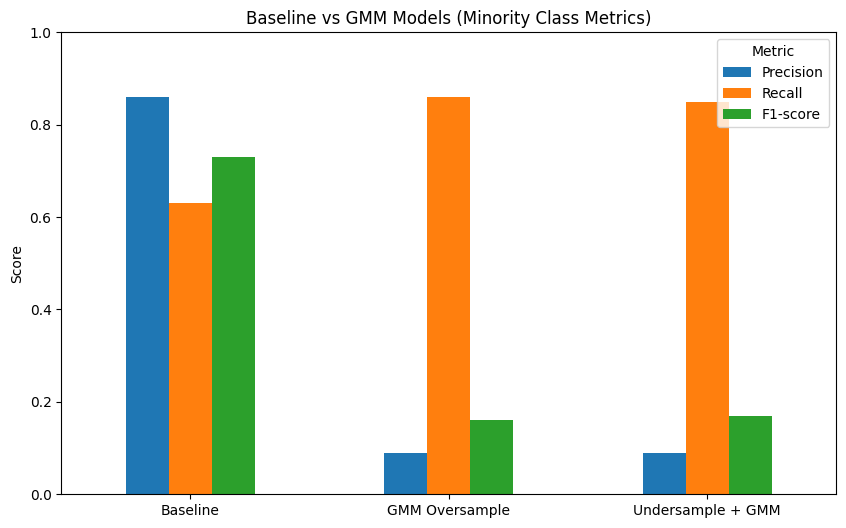

In [78]:
# Analysing the classification parameters of different Models
metrics = {
    "Baseline": {"Precision": 0.86, "Recall": 0.63, "F1-score": 0.73},
    "GMM Oversample": {"Precision": 0.09, "Recall": 0.86, "F1-score": 0.16},
    "Undersample + GMM": {"Precision": 0.09, "Recall": 0.85, "F1-score": 0.17}
}

df = pd.DataFrame(metrics).T

print("Summary Table (Minority Class - Fraud):")
display(df)
df.plot(kind="bar", figsize=(10,6))
plt.title("Baseline vs GMM Models (Minority Class Metrics)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.show()

##### Impact of GMM-Based Oversampling on Classifier Performance

In the baseline model, the classifier performed strongly for the majority class (non-fraudulent transactions) and reasonably well for the minority class (fraudulent transactions).  
The minority class achieved a **precision of 0.86**, a **recall of 0.63**, and an **F1-score of 0.73**. This indicates that, when the model predicted fraud, it was usually correct. However, it still missed a significant portion of fraudulent cases, failing to detect approximately 37% of them.  

---

When Gaussian Mixture Model (GMM)-based oversampling was introduced, the behavior of the classifier changed dramatically.  
The recall for the minority class improved from **0.63 to 0.86**, meaning that the model was now able to capture the vast majority of fraudulent cases that were previously being missed.  
At first glance, this seems like a success—the model became more sensitive to the minority class, which was the intended purpose of oversampling.  

However, this gain came at a significant cost.  
The **precision dropped sharply from 0.86 to just 0.09**.  
In other words, while the model was flagging many more fraudulent transactions, the overwhelming majority of those flags were actually false alarms.  
This collapse in precision reduced the overall **F1-score to 0.16**, far below the baseline.  
In practical terms, such a model would overwhelm investigators with false positives, making it less useful despite the higher recall.  

---

A second strategy was tested by first **undersampling the majority class** and then using GMM to generate synthetic samples for the minority class.  
This approach led to very similar results: the recall remained high (**0.85**), but the precision stayed extremely low (**0.09**).  
Although the balance between classes was altered, the trade-off between precision and recall persisted, leading to an overall **F1-score of only 0.17**.  

---

##### Conclusion

The experiments clearly show that **GMM-based oversampling improved the model’s ability to detect the minority class** by substantially increasing recall.  
However, it did so at the expense of precision, which dropped to unacceptably low levels.  

The baseline model, while less sensitive, offered a more balanced trade-off between precision and recall, resulting in a much stronger F1-score.  
Therefore, while GMM oversampling achieves the goal of increasing fraud detection, the cost in terms of false alarms is too high to make the model practically useful in its current form.  

In real-world fraud detection systems, such a trade-off is common.  
Depending on the business context, recall may be prioritized (catching more fraud, even with false positives), or precision may be valued (minimizing false alarms).  
The results here highlight the importance of **choosing resampling strategies carefully** and potentially combining them with **threshold tuning, cost-sensitive learning, or hybrid ensemble methods** to strike a better balance between precision and recall.  


##### Recommendation on the Effectiveness of GMM for Synthetic Data Generation

Based on both the experimental results and the theoretical foundations of Gaussian Mixture Models (GMM), it can be concluded that **GMM-based synthetic data generation is not effective in this context of fraud detection**.  

---

##### 1. Evidence from Results

The baseline model already demonstrated a strong balance between **precision (0.86)** and **recall (0.63)** for the minority class, yielding a solid **F1-score of 0.73**. This indicates that, although some fraudulent cases were missed, the predictions made were generally reliable.  

When GMM oversampling was introduced, recall improved substantially (**0.86**), meaning that the classifier became more sensitive and captured most fraudulent cases. However, this improvement came at a severe cost: **precision dropped from 0.86 to 0.09**, and the **F1-score collapsed to just 0.16**.  

A variation using undersampling followed by GMM oversampling produced nearly identical outcomes, with slightly different numerical values but the same fundamental trade-off—high recall but extremely poor precision.  

In practice, this means that while the classifier became much better at flagging fraudulent cases, it generated an overwhelming number of false positives. Such behavior would flood investigators with alerts, reducing trust in the system and ultimately making it impractical.  

---

##### 2. Theoretical Understanding of GMM in Oversampling

GMM is theoretically attractive because it models the underlying probability distribution of data by fitting multiple Gaussian components.  
This allows it to capture more complex structures in the feature space compared to simpler oversampling methods such as SMOTE, which rely on linear interpolation between neighbors.  

However, in highly imbalanced datasets such as fraud detection, the **minority class is both scarce and noisy**.  
- GMM may overfit to the limited available minority samples.  
- Synthetic points generated from these Gaussians can overlap significantly with the majority class.  
- As a result, the decision boundary becomes blurred, leading to a dramatic increase in false positives.  

Thus, while GMM has strong theoretical potential, its effectiveness depends heavily on the quality and separability of the minority class distribution. In this case, the minority class is not well-defined, and the Gaussian assumption does not hold strongly enough to generate useful synthetic data.  

---

##### 3. Recommendation

Given the results and the underlying theoretical limitations, **I do not recommend using GMM-based oversampling as the sole strategy for fraud detection in this dataset**.  

Instead, more effective alternatives should be considered:  
- **Hybrid methods** combining GMM with cluster-based undersampling or ensemble learning.  
- **Cost-sensitive classifiers** that penalize misclassification of the minority class without distorting the data distribution.  
- **Threshold tuning** on the baseline model to improve recall while maintaining an acceptable precision.  
- **Anomaly detection approaches**, which may better reflect the rare-event nature of fraud cases.  

---

##### Final Statement

In summary, while GMM oversampling did succeed in improving recall, it drastically harmed precision, leading to a poor overall performance.  
The method, in this context, introduces more noise than signal.  
Therefore, it should not be relied upon as an effective synthetic data generation technique for this fraud detection problem without significant modifications or combinations with other strategies.  
